Simple Linear Regression: From Scratch and Using sklearn

Author: Atharva Darpude

Dataset: expsal.csv (Years of Experience vs Salary)

🧪 Step 1: Import Required Libraries

In [177]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

📥 Step 2: Load Dataset

In [178]:
data=pd.read_csv("expsal.csv")
exp=data["YearsExperience"]
sal=data["Salary"]

📊 Step 3: Scatter Plot of Data

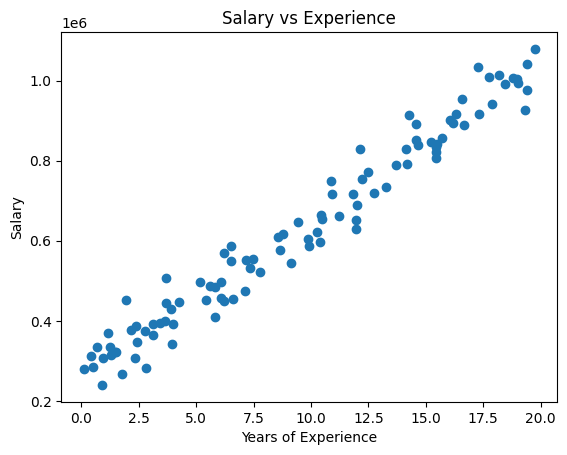

In [179]:
plt.scatter(exp,sal)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()


Step 4: Creating Data sets

In [202]:
ran_ind = np.random.permutation(len(exp))
train_ind = ran_ind[:int(0.80 * len(exp))]
test_ind = ran_ind[int(0.80 * len(exp)):]

exp_train = exp.iloc[train_ind].reset_index(drop=True)
sal_train = sal.iloc[train_ind].reset_index(drop=True)
exp_test = exp.iloc[test_ind].reset_index(drop=True)
sal_test = sal.iloc[test_ind].reset_index(drop=True)


⚙️ Step 4: Linear Regression from Scratch

In [203]:
class linR:
    def __init__(self):
        self.m = 0
        self.c = 0

    def training(self, exp_train, sal_train):
        numerator = 0
        denominator = 0
        for i in range(len(exp_train)):
            numerator += (exp_train[i] - np.mean(exp_train)) * (sal_train[i] - np.mean(sal_train))
            denominator += (exp_train[i] - np.mean(exp_train)) ** 2
        self.m = numerator / denominator
        self.c = np.mean(sal_train) - (self.m * np.mean(exp_train))
        return self.m, self.c

    def test(self, exp_test, sal_test):
        me = 0
        for i in range(len(exp_test)):
            y_pred = self.predict(exp_test[i])
            me += abs(y_pred - sal_test[i])
        me /= len(exp_test)
        return me

    def predict(self, x_predict):
        return self.m * x_predict + self.c




In [204]:

model = linR()
model.training(exp_train, sal_train)
me = model.test(exp_test, sal_test)
print(f"Mean Error (ME) on the test set: {me}")

Mean Error (ME) on the test set: 41145.41980624161


 📉 Plotting Prediction Line

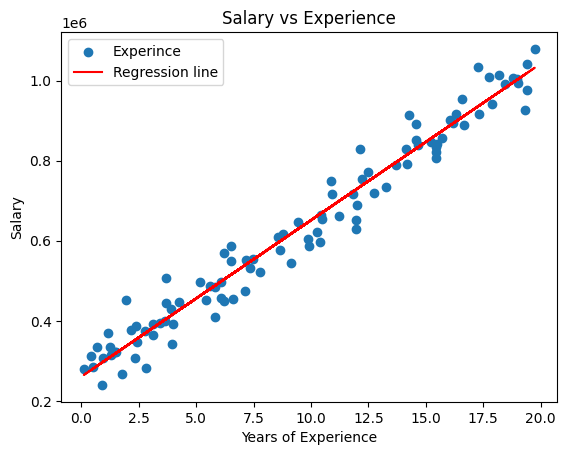

In [205]:
plt.scatter(exp,sal,label="Experince")
plt.plot(exp, model.predict(exp), color='red',label="Regression line")
plt.legend()
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Salary vs Experience")
plt.show()

⚡ Step 5: Compare with sklearn

Slope (m): 39076.32990446485
Intercept (c): 260590.39039647253
Mean Absolute Error: 41145.41980624159


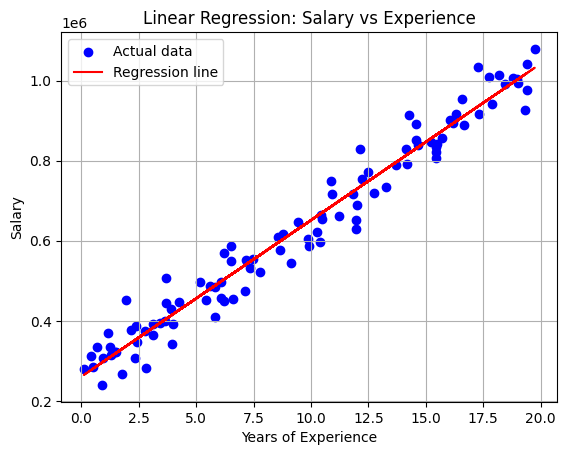

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

exp_train_np = np.array(exp_train).reshape(-1, 1)
sal_train_np = np.array(sal_train).reshape(-1, 1)
exp_test_np = np.array(exp_test).reshape(-1, 1)
sal_test_np = np.array(sal_test).reshape(-1, 1)

model = LinearRegression()
model.fit(exp_train_np, sal_train_np)

sal_pred = model.predict(exp_test_np)

print(f"Slope (m): {model.coef_[0][0]}")
print(f"Intercept (c): {model.intercept_[0]}")

mae = mean_absolute_error(sal_test_np, sal_pred)
print(f"Mean Absolute Error: {mae}")

experience = np.array(exp).reshape(-1, 1)
salary = np.array(sal).reshape(-1, 1)

plt.scatter(experience, salary, color='blue', label='Actual data')
plt.plot(experience, model.predict(experience), color='red', label='Regression line')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression: Salary vs Experience")
plt.legend()
plt.grid(True)
plt.show()


Comparsion

In [208]:
print("mean error without sklearn = ",me)
print("mean error with sklearn = ",mae)

mean error without sklearn =  41145.41980624161
mean error with sklearn =  41145.41980624159
